In [1]:
#importing the required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv file.

df=pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


1. N - ratio of nitrogen content in soil.
2. P - ratio of phosphorous content in soil.
3. K - ratio of Potassium content in soil.
4. humidity -  Relative humidity in %.
4. ph - ph value of soil.
5. Temperature (Celsius)
6. Rainfall (mm)


In [3]:
df.shape

(2200, 8)

In [4]:
df.info()  #To view full information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


1. It has 2200 row and 8 columns.
2. dtypes: Integer(3); Float(4) & Object(1). 
3. The dataset has no missing values.

In [5]:
df.isna().sum()   # Checking for any Null values.

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

The dataset doesn't have any null values.

In [6]:
df.drop_duplicates(keep="first",inplace=True) #Dropping the duplicates values (if any).

In [7]:
df.describe().T # To view the statistical summary of the dataset.

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


1. Nitrogen,Phosphorous,Potassium & rainfall show positive skewness.
2. Since mean<median, humidity is negatively skewed.
3. so there could be outliers in our daatset
4. The rainfall received varies from 20.2 mm to almost 300 mm
5. There is variation in temp. too depending on the crop cultivated

N
0.5093737660143558


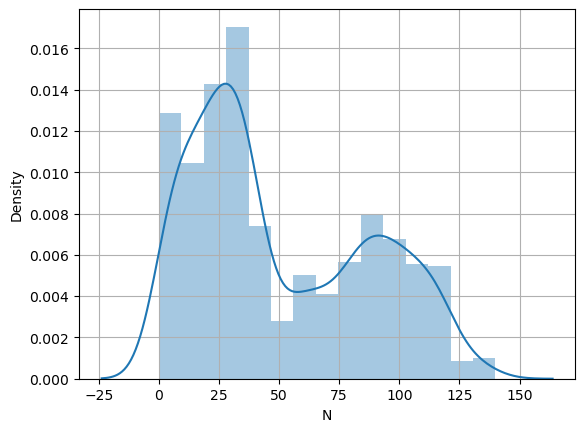

P
1.0100832494748144


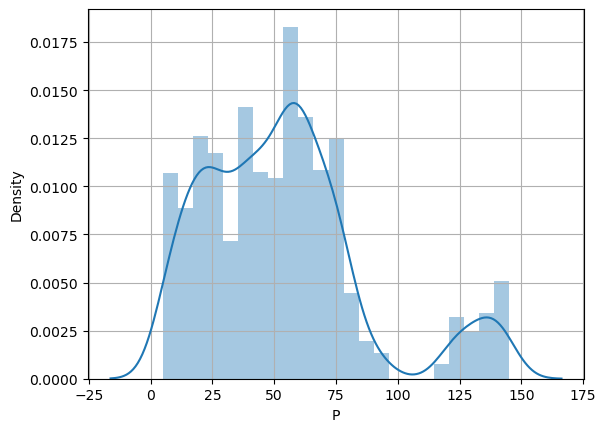

K
2.373547499838119


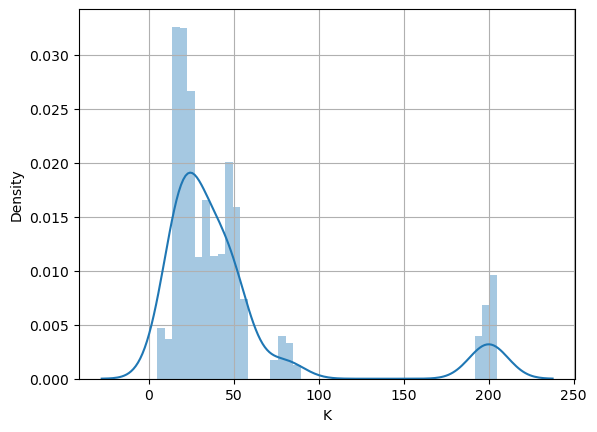

temperature
0.18480661982240237


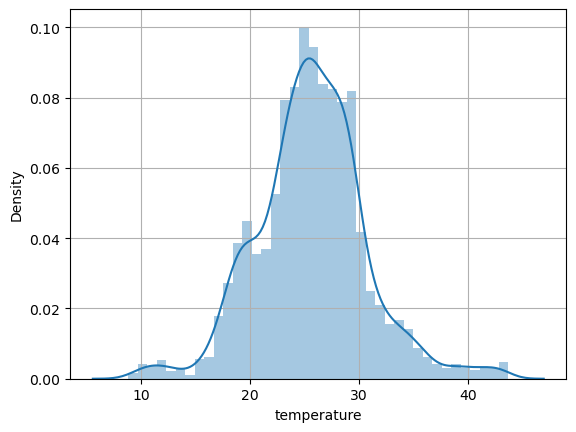

humidity
-1.090963432252511


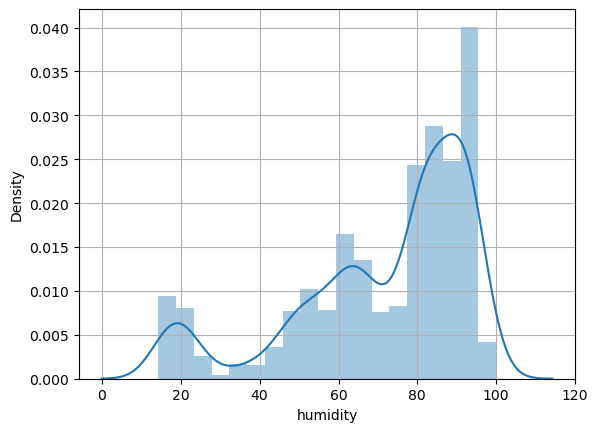

ph
0.2837358126439414


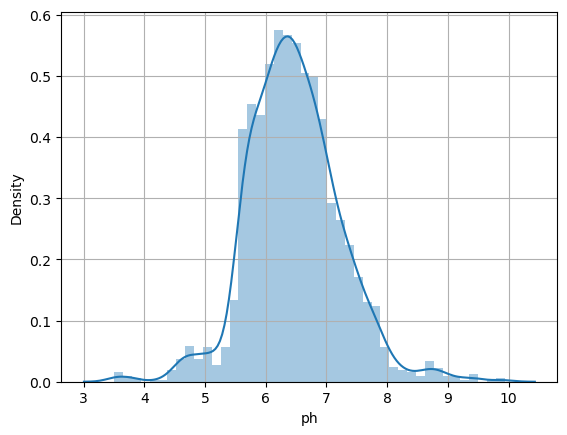

rainfall
0.9650977586362035


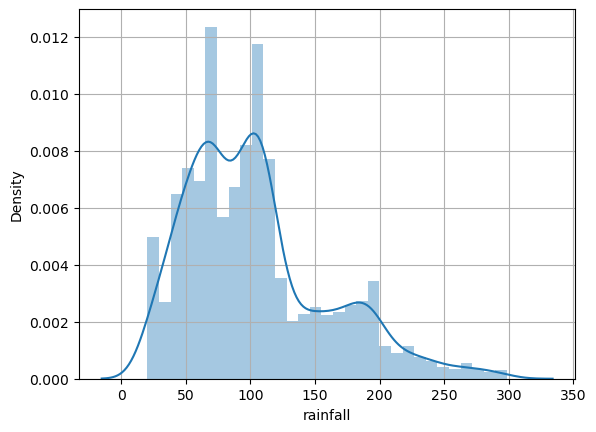

In [8]:
# viewing skewness graphically.

from scipy.stats import skew

for col in df.iloc[:,:-1]:
    print(col)
    print(skew(df[col]))
    
    #plt.figure()
    sns.distplot(df[col])
    plt.grid()
    plt.show()

In [9]:
df.describe(exclude='number').T

,count,unique,top,freq
label,2200,22,rice,100


In [10]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

The dataset has same no. of observation for each crop.

In [11]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

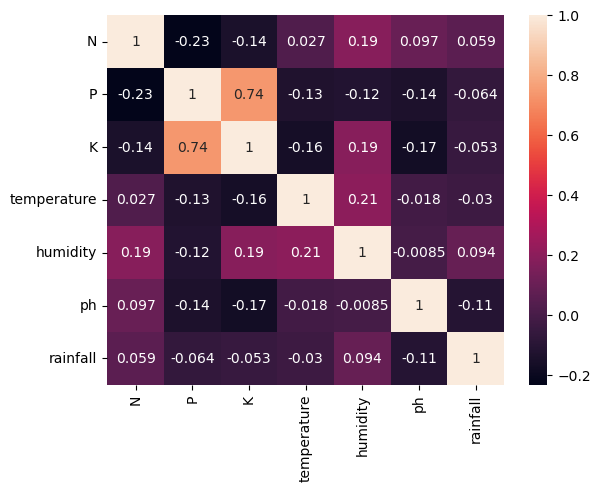

In [12]:
sns.heatmap(df.corr(),annot=True) #checking co-relation between columns.

In [13]:
# P and K show strong positive co-relationship
# whereas humidity and temp. show weak +ve co-relation.
# N & P are negatively co-related.

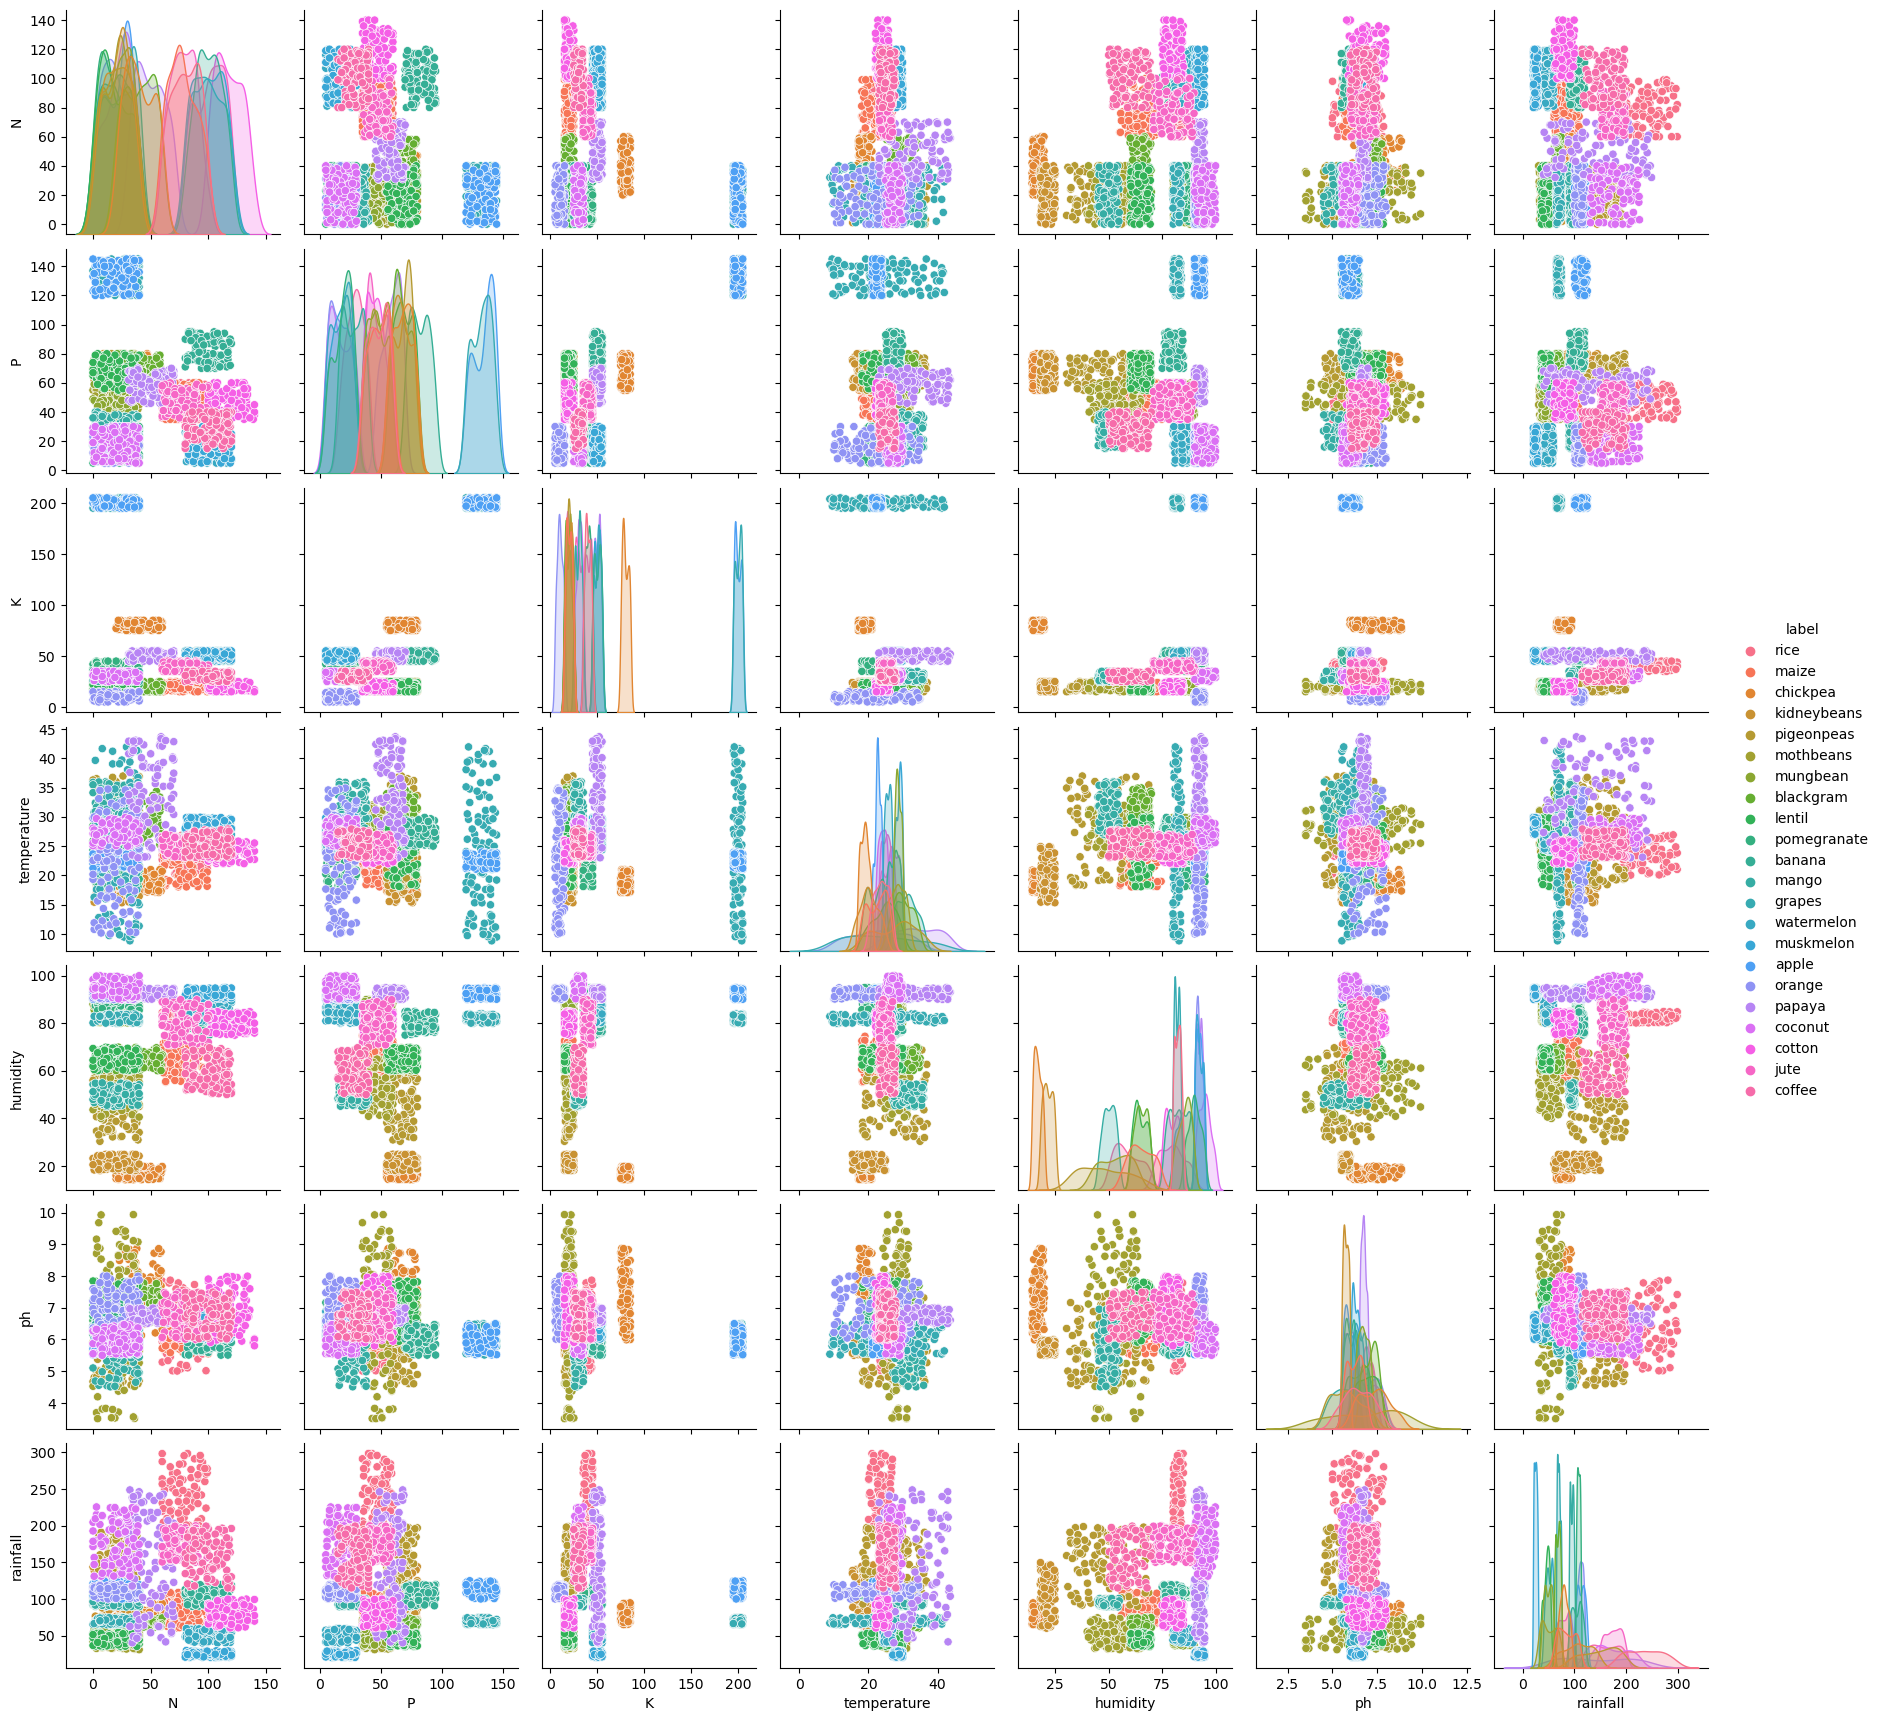

In [14]:
sns.pairplot(df,hue="label")

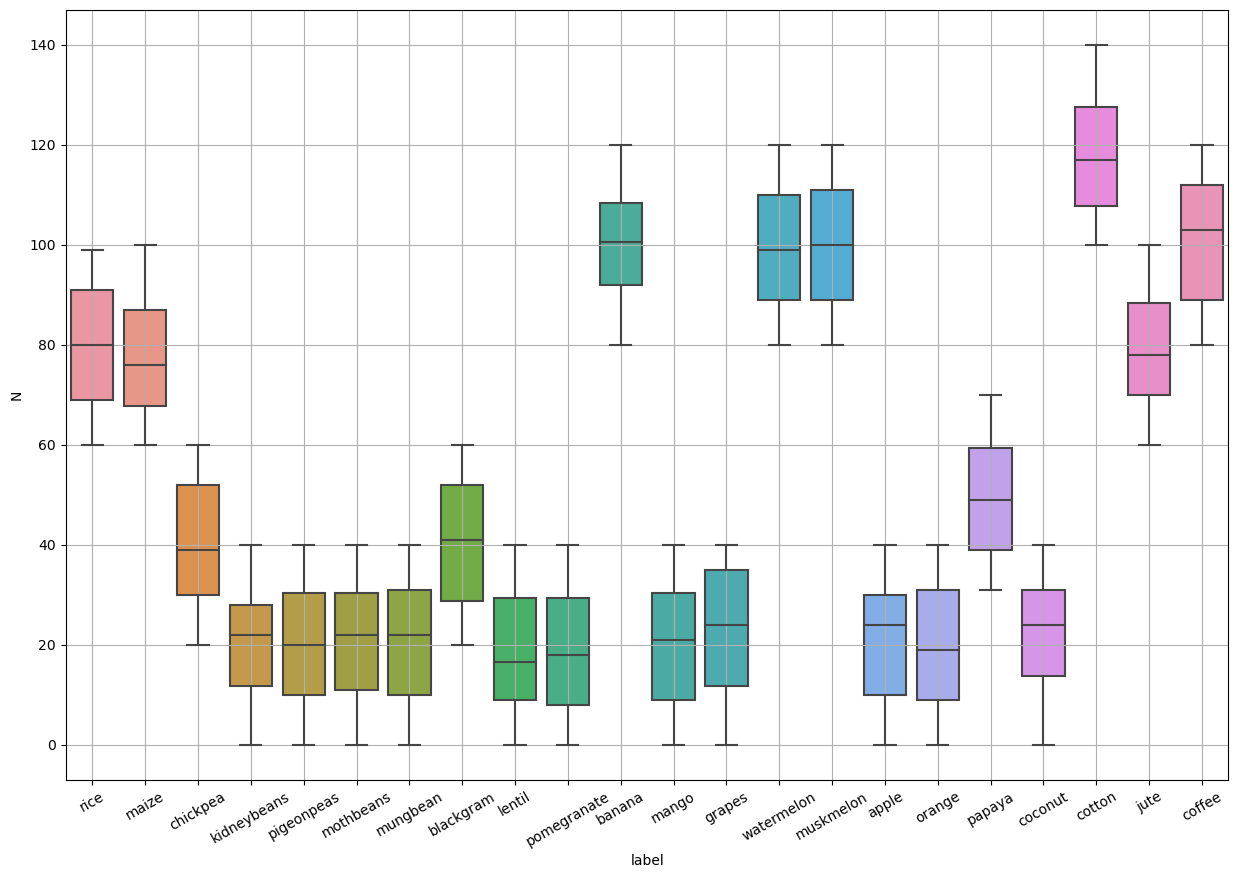

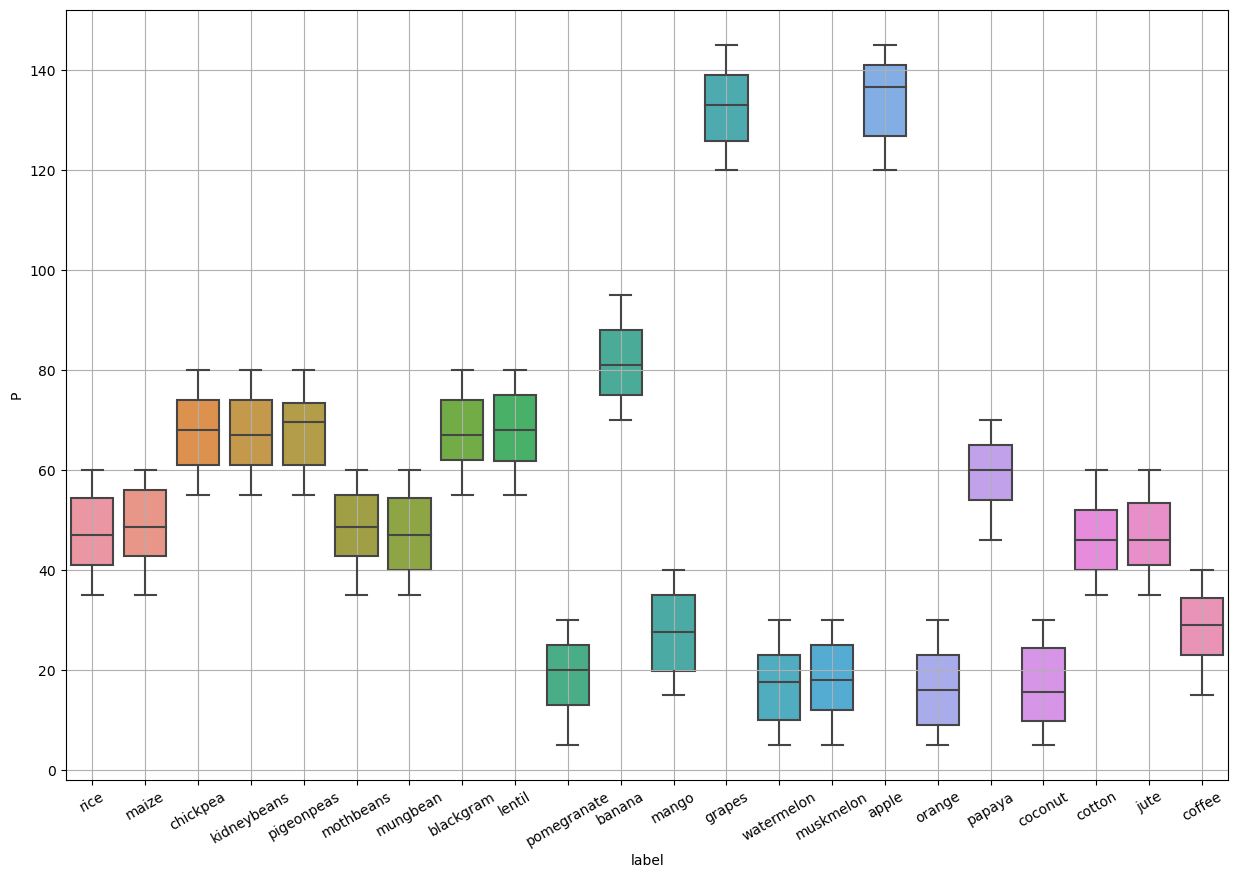

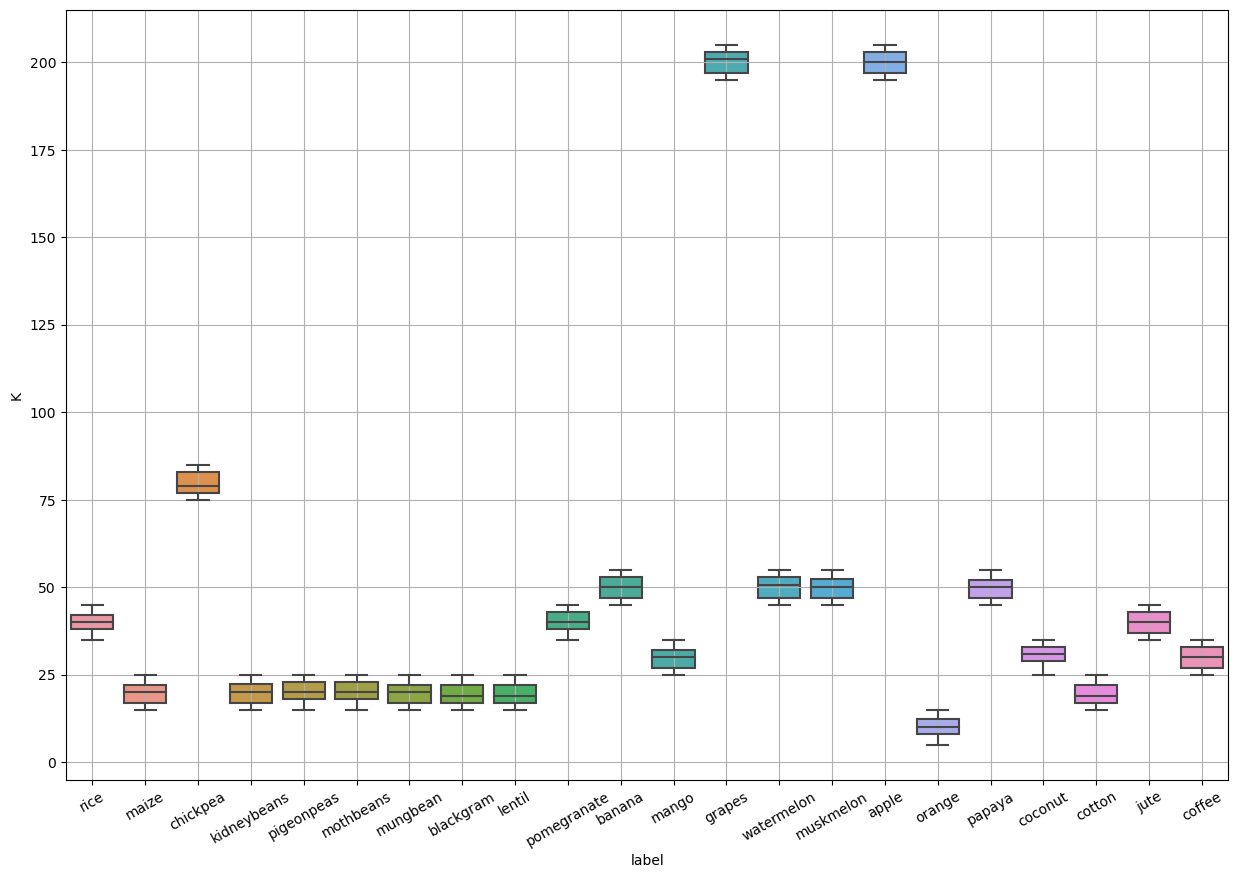

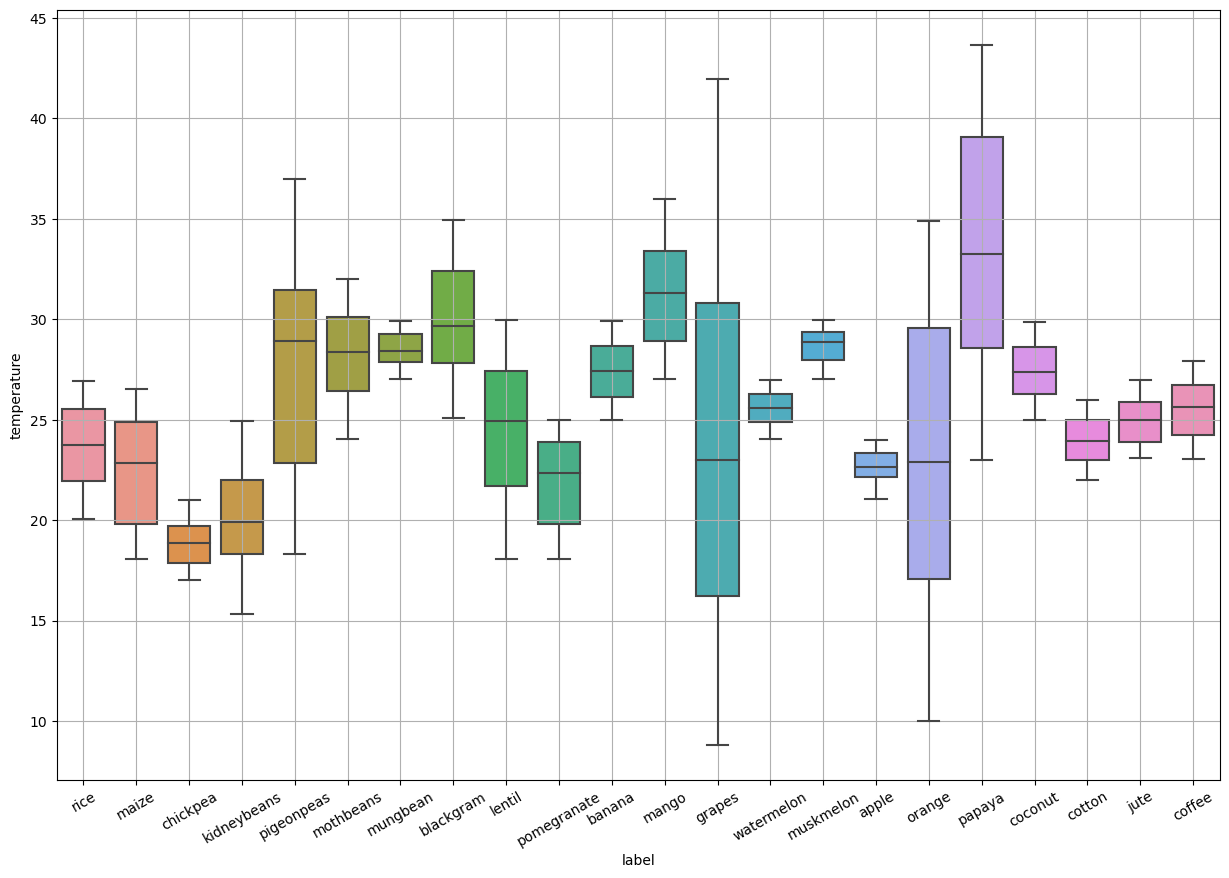

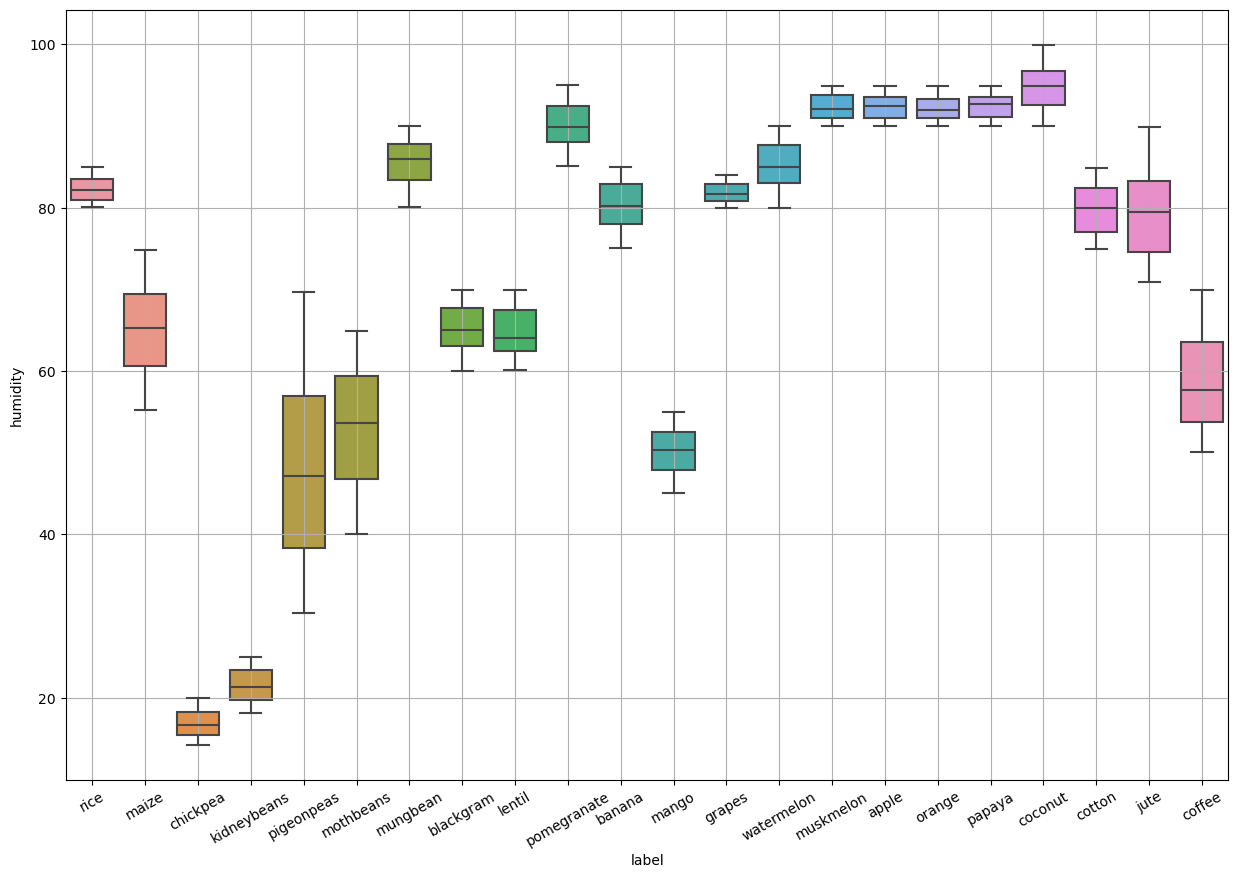

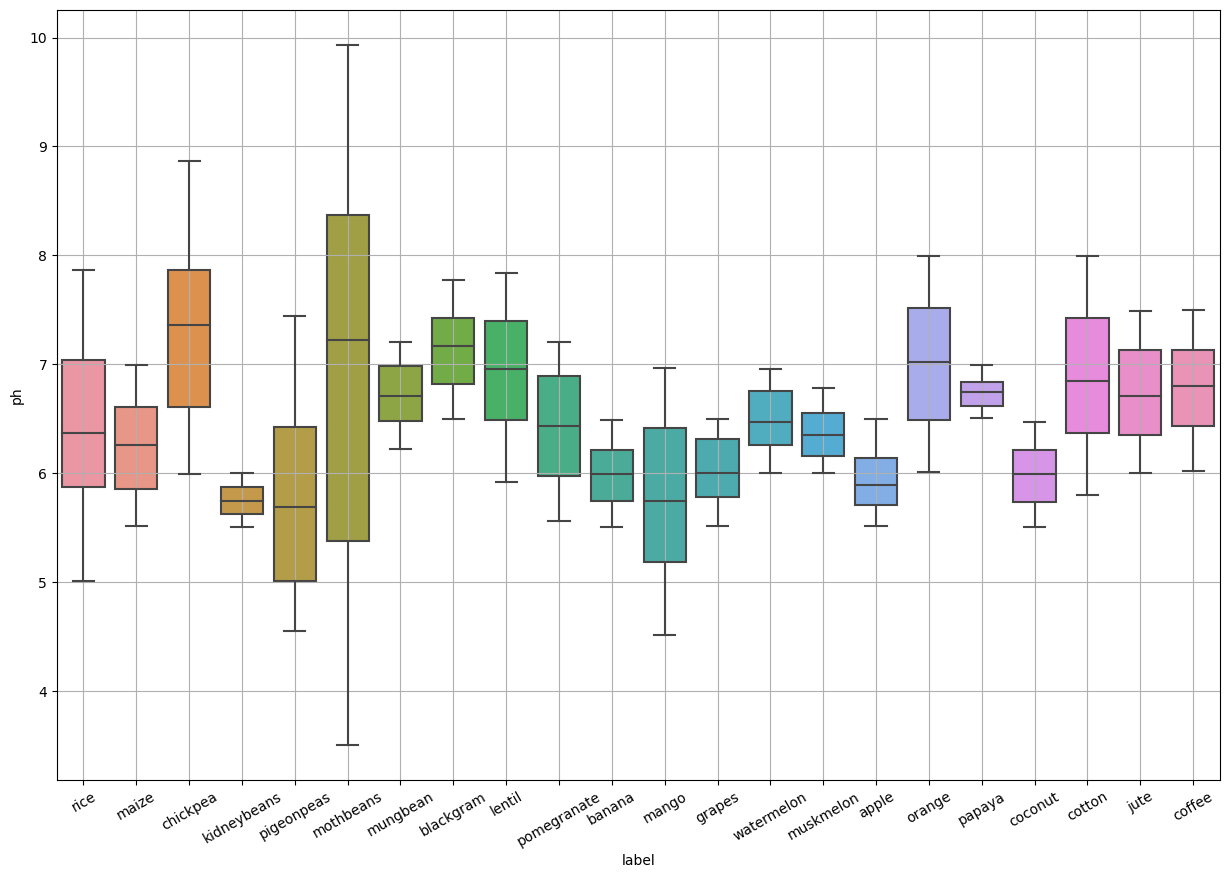

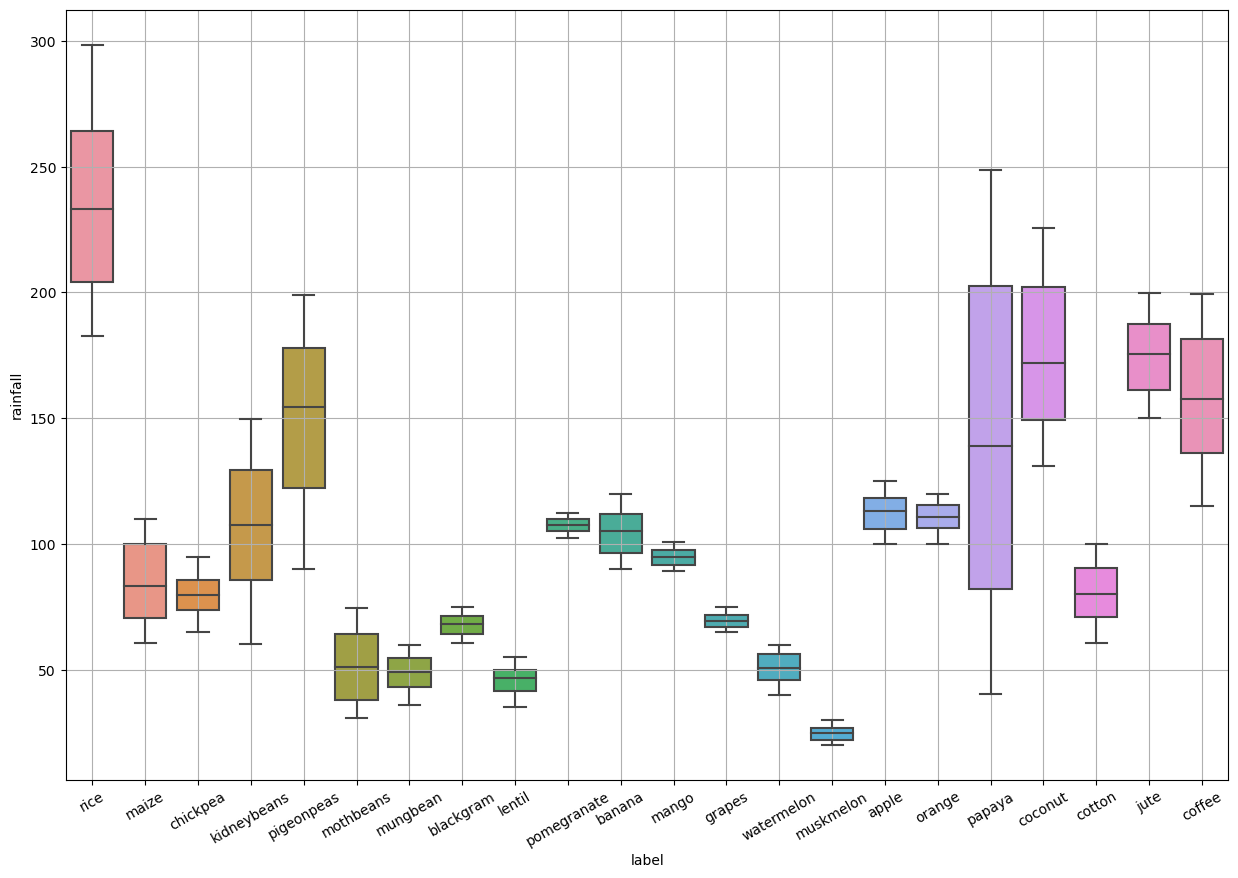

In [15]:
df_req=df.iloc[:,:-1]
for i in df_req:
    plt.figure(figsize=(15,10))
    sns.boxplot(x ='label',y=i,data=df)
    plt.xticks(rotation=30)
    plt.grid()
    plt.show()
    
# Analyzing the amount of minerals,rainfall,humidity.,etc suitable for differents crops.

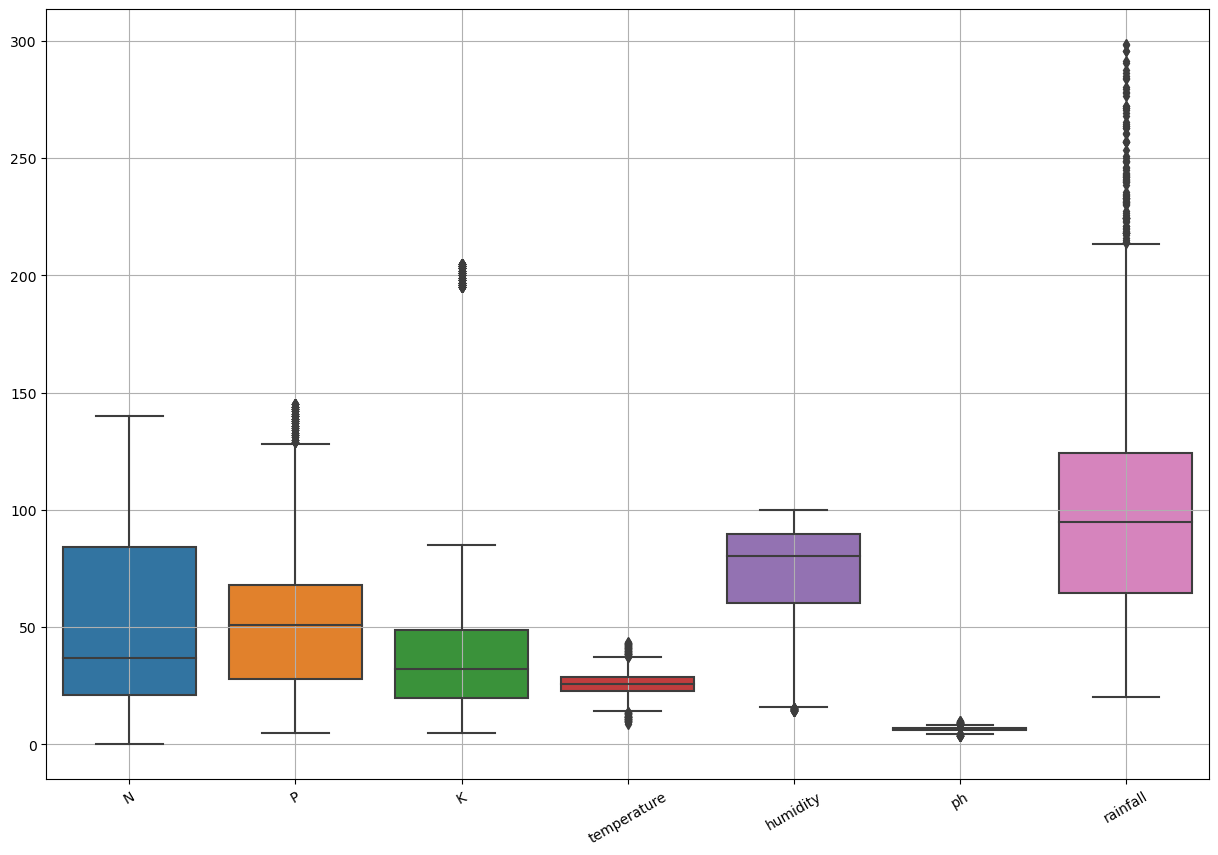

In [16]:
#outliers detection
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=30)
plt.grid()
plt.show()

1. We can see clearly that there are ouliers in our dataset.
2. Except Nitrogen rest all have outliers.
3. Rainfall has max no. outliers


In [17]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [18]:
#plt.figure(figsize=(8,8))
#df["label"].value_counts().plot(kind="pie",autopct='%.2f%%')
#plt.show'''

Dataset has even no. of observation for all labels

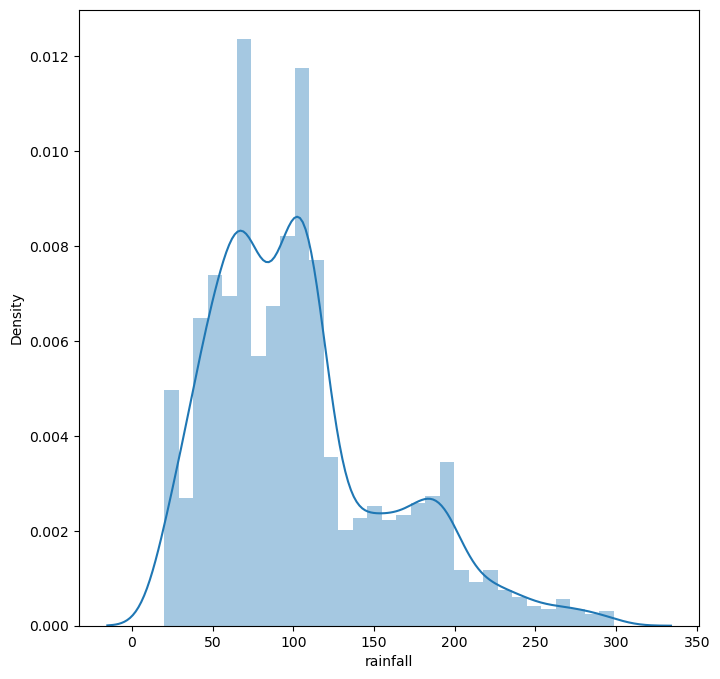

In [19]:
plt.figure(figsize=(8,8))
sns.distplot(df["rainfall"])
plt.show()

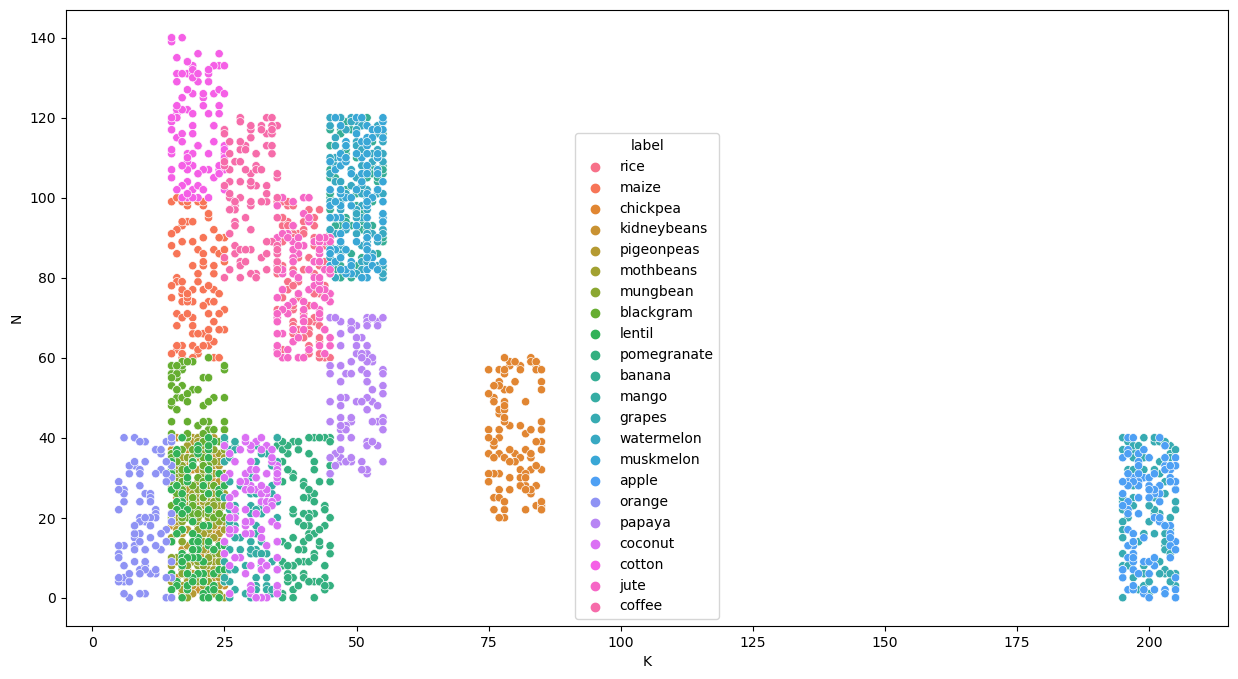

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='K',y="N",hue="label")
plt.show()

1. The nitrogen anf potassium requirement for various crop is shown above.
2. Crops like Apple,banana/mango need low N but high K level.
3. Cotton,Cofee,Muskmelon,Watermelon and maize need high N content and low K level.
4. Orange,coconut,lentils,blackgram,etc can be grown in low N and P level

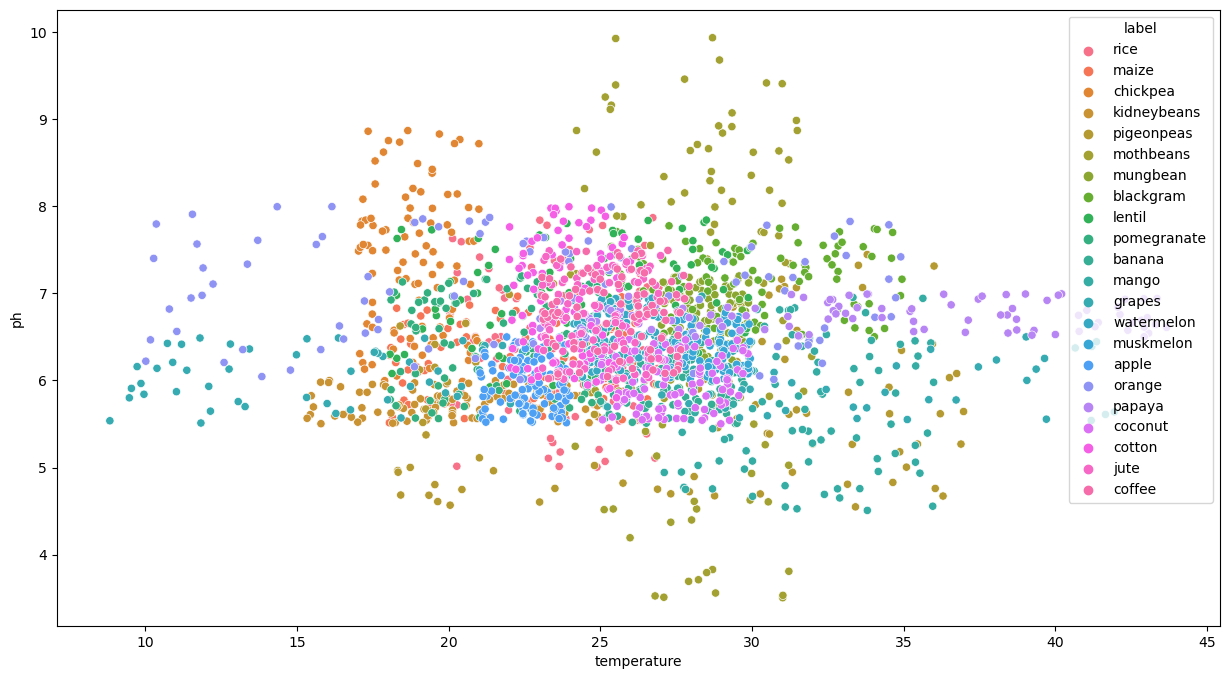

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,y='ph',x="temperature",hue="label")
plt.show()

1. The ph range of 5 to 8 and temperature range of 17 to 32 is suitable or most of the crops.

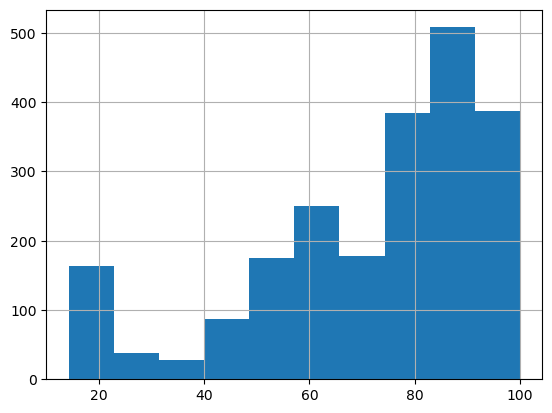

In [22]:
df["humidity"].hist()
plt.show()

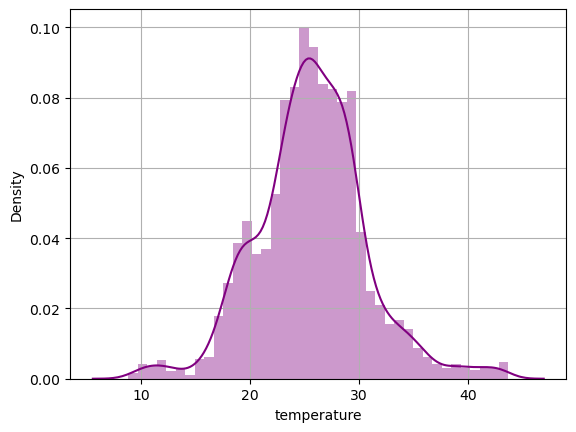

In [23]:
sns.distplot(df["temperature"],color='purple')
plt.grid()
plt.show()

for most of thre crop, the temp. requirement is between 17 to 35 celsius.

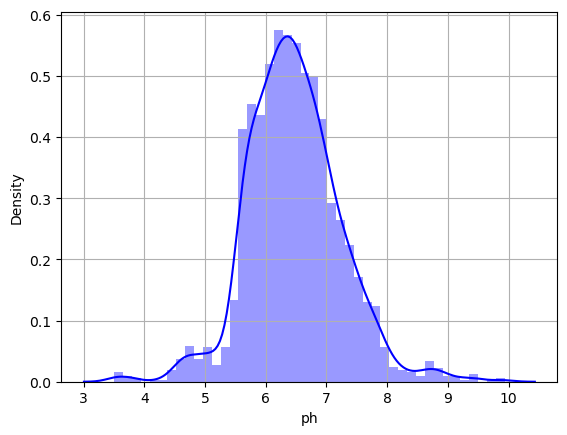

In [24]:
sns.distplot(df["ph"],color='blue')
plt.grid()
plt.show()

The ph range for most crops is from 5 to 8

In [25]:
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


The label column need to be converted to numeric type 

In [26]:
#coverting the label from categorical to numeric type.

#from sklearn.preprocessing import OrdinalEncoder
#oe=OrdinalEncoder()
#df["label"]=oe.fit_transform(df[["label"]])

In [27]:
df.head(3)  

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [28]:
#splitting of Data into features and target for predictive learning.

features=df.iloc[:,:-1]
target=df["label"]

In [29]:
#Data Scaling

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
features.iloc[:,:]=ss.fit_transform(features.iloc[:,:])

In [30]:
features.head(3)

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066


In [31]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=1)

In [32]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1540, 7)
(660, 7)
(1540,)
(660,)


In [33]:
trainac=[]
testac=[]
model=[]

# KNN Classifier

In [34]:
from sklearn.neighbors import  KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac=accuracy_score(ytest,ypred)
#cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print('KNN accuracy is: ',ac)
print("\nClassification Report:\n",cr)

KNN accuracy is:  0.9787878787878788

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        28
   blackgram       0.88      1.00      0.94        29
    chickpea       1.00      1.00      1.00        28
     coconut       0.96      1.00      0.98        25
      coffee       1.00      1.00      1.00        28
      cotton       0.97      1.00      0.99        36
      grapes       1.00      1.00      1.00        44
        jute       0.89      1.00      0.94        32
 kidneybeans       1.00      1.00      1.00        33
      lentil       0.93      0.96      0.95        27
       maize       1.00      0.96      0.98        28
       mango       0.94      1.00      0.97        32
   mothbeans       1.00      0.85      0.92        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        36
      orange       

In [36]:
tr_ac=knn.score(xtrain,ytrain)
te_ac=knn.score(xtest,ytest)

In [37]:
print("Training score : ",tr_ac)
print("Testing score : ",te_ac)

trainac.append(tr_ac)
testac.append(te_ac)
model.append("KNN")

Training score :  0.9837662337662337
Testing score :  0.9787878787878788


# NaiveBayesClassifier

In [38]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
ypred=gnb.predict(xtest)

In [39]:
print("NaiveBayesClassifier accuracy is: ",accuracy_score(ytest,ypred))
print("\nClassification Report:\n",classification_report(ytest,ypred))

NaiveBayesClassifier accuracy is:  0.9954545454545455

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        28
   blackgram       1.00      1.00      1.00        29
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        44
        jute       0.91      1.00      0.96        32
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        27
       maize       1.00      1.00      1.00        28
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        36
  

In [40]:
tr_ac=gnb.score(xtrain,ytrain)
te_ac=gnb.score(xtest,ytest)

In [41]:
print("Training score : ",tr_ac)
print("Testing score : ",te_ac)

trainac.append(tr_ac)
testac.append(te_ac)
model.append("NaiveBayes")

Training score :  0.9948051948051948
Testing score :  0.9954545454545455


# Support Vector Machine (SVM)

In [42]:
from sklearn.svm import SVC

svm=SVC()
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)

In [43]:
print("SVM accuracy is: ",accuracy_score(ytest,ypred))
print("\nClassification Report:\n",classification_report(ytest,ypred))

SVM accuracy is:  0.9803030303030303

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        28
   blackgram       0.93      0.97      0.95        29
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        44
        jute       0.82      1.00      0.90        32
 kidneybeans       1.00      1.00      1.00        33
      lentil       0.93      0.96      0.95        27
       maize       1.00      1.00      1.00        28
       mango       0.97      1.00      0.98        32
   mothbeans       1.00      0.91      0.95        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        36
      orange       

In [44]:
tr_ac=svm.score(xtrain,ytrain)
te_ac=svm.score(xtest,ytest)

In [45]:
print("Training score : ",tr_ac)
print("Testing score : ",te_ac)

trainac.append(tr_ac)
testac.append(te_ac)
model.append("SVM")

Training score :  0.9844155844155844
Testing score :  0.9803030303030303


# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier


DT= DecisionTreeClassifier()
DT.fit(xtrain,ytrain)
ypred=DT.predict(xtest)

In [47]:
print("Decision Tree accuracy is: ",accuracy_score(ytest,ypred))
print("\nClassification Report:\n",classification_report(ytest,ypred))

Decision Tree accuracy is:  0.9863636363636363

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        28
   blackgram       0.97      1.00      0.98        29
    chickpea       1.00      0.93      0.96        28
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        28
      cotton       0.97      1.00      0.99        36
      grapes       1.00      1.00      1.00        44
        jute       0.94      0.91      0.92        32
 kidneybeans       0.94      1.00      0.97        33
      lentil       1.00      1.00      1.00        27
       maize       1.00      0.96      0.98        28
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.97      0.98        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        36
      ora

In [48]:
tr_ac=DT.score(xtrain,ytrain)
te_ac=DT.score(xtest,ytest)

In [49]:
print("Training score : ",tr_ac)
print("Testing score : ",te_ac)

trainac.append(tr_ac)
testac.append(te_ac)
model.append("Decision Tree")

Training score :  1.0
Testing score :  0.9863636363636363


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=25)
RF.fit(xtrain,ytrain)
ypred=RF.predict(xtest)

In [51]:
print("Random Forest accuracy is: ",accuracy_score(ytest,ypred))
print("\nClassification Report:\n",classification_report(ytest,ypred))

Random Forest accuracy is:  0.996969696969697

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        28
   blackgram       1.00      1.00      1.00        29
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        44
        jute       0.94      1.00      0.97        32
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        27
       maize       1.00      1.00      1.00        28
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        36
      oran

In [52]:
tr_ac=RF.score(xtrain,ytrain)
te_ac=RF.score(xtest,ytest)

In [53]:
print("Training score : ",tr_ac)
print("Testing score : ",te_ac)

trainac.append(tr_ac)
testac.append(te_ac)
model.append("Random Forest")

Training score :  1.0
Testing score :  0.996969696969697


# Comparing accuracy of models

In [54]:
model

['KNN', 'NaiveBayes', 'SVM', 'Decision Tree', 'Random Forest']

In [55]:
trainac

[0.9837662337662337, 0.9948051948051948, 0.9844155844155844, 1.0, 1.0]

In [56]:
testac

[0.9787878787878788,
 0.9954545454545455,
 0.9803030303030303,
 0.9863636363636363,
 0.996969696969697]

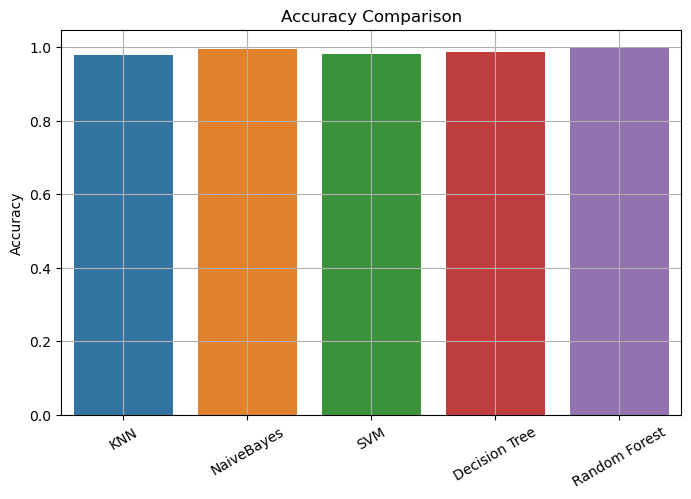

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x=model,y=testac)
plt.xticks(rotation=30)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [58]:
#conclusion : 1. All models shows good accuracy.
#             2. The best performing models are NaiveBayes & RandomForest.

# Predicting  crop

def crop():
    N=float(input("Enter Nitrogen content: "))
    P=float(input("Enter Potassium content: "))
    K=float(input("Enter Phosphorous content: "))
    Temp=float(input("Enter Temperature: "))
    Humidity=float(input("Enter humidity: "))
    ph=float(input("Enter ph of soil: "))
    Rain=float(input("Enter Rainfall: "))
    newob=[[N,P,K,Temp,Humidity,ph,Rain]]
    yp=gnb.predict(newob)
    print(yp)

crop()